In [1]:
!pip install nltk
!pip install gensim
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install matplotlib
!pip install tensorflow
!pip install keras
!pip install nrclex
!pip install tweepy
!pip install preprocessor

# Lemmatization and Stopword Removal Function

In [2]:
from nltk.corpus import stopwords
import nltk
from nltk import word_tokenize,WordNetLemmatizer
nltk.download('stopwords')
stoplist = stopwords.words('english')
print("Stop words list: ",stoplist)

#Lemmatization Function
def lem_message(text):
    temp=[]
    text = text.split()
    wl=WordNetLemmatizer()
    for i in text:
        temp.append(wl.lemmatize(i,pos='v'))
    return " ".join(temp)

#StopWord Removal Function
def remove_stopwords(text,stoplist):
    temp=[]
#     print(text)
#     print (len(text))
    text = text.split()
    for i in range (len(text)):
        if text[i] not in stoplist:
            temp.append(text[i])
    return " ".join(temp)

Stop words list:  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAMSUNG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Reading

In [3]:
import gensim
import numpy as np
import pandas as pd
import nltk
import collections
import re
import string
from collections import Counter
from nltk import word_tokenize,WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence


In [4]:
#Importing 1st Dataset- Sexually Explicit
data1 = pd.read_csv('./data/sexually_explicit.csv', error_bad_lines=False,names= ["tweet"])

In [5]:
data1.shape

(11003, 1)

In [6]:
#Putting labels as 1 to this dataset as these were all harassment tweets
data1["label"] = np.ones((data1.shape[0]))

In [7]:
data1

,tweet,label
0,I would never have guessed you had tits that b...,1.0
1,I’ll be you one day... med student here! Gorge...,1.0
2,Those nipples are amazing!,1.0
3,r/hardboltons,1.0
4,Doctors that buy their tits always show them off.,1.0
...,...,...
10998,I’d love to tongue your pussy till you cum all...,1.0
10999,Sexy kitty. I’d love to pet ;),1.0
11000,Looks so tight! What's the biggest cock you've...,1.0
11001,Looks delicious....🤤🤤,1.0


In [8]:
#Importing 2nd Dataset- Hate Speech
data2 = pd.read_csv("./data/train_E6oV3lV.csv")
data2 = data2[["tweet","label"]]

In [9]:
data2.shape

(31962, 2)

In [10]:
#Importing 3rd Dataset - Twitter Scrapping
data3= pd.read_csv("./Twitter Data 1.xls",names = ["tweet"])
data3

,tweet
0,b'Watching amateur porn is fun cause my kink i...
1,"b""@SirChompyFace Thanks! I'm still am amateur ..."
2,b'@DenizSaaat @BustaRhymes @WhyBitcoinJ My opi...
3,"b""I believe you believe that amateur radio is ..."
4,"b""@delaroess always possible to go 'amateur' h..."
...,...
18381,b'I think the PM should have been the one to a...
18382,b'@StanSmithReal stanley the blacksmith is a r...
18383,b'Cuando a Jhope golden el best raper y vocal ...
18384,b'#jennieperfect #Jenniebeautiful #Jennieitgir...


In [11]:
#Importing 4th Dataset - Twitter Scrapping
data4 = pd.read_csv("./Twitter data 2.xls",names = ["tweet"])
data4

,tweet
0,b'@daudikabanda is an amateur in politics who...
1,"b""@Andysallotment You're welcome. I am an ama..."
2,b'Steveson is doing the right thing. Amateur w...
3,"b""@H_M_Parker @YorkshireLady3 It's just a big ..."
4,"b'Cum for me!, for sexy dating, contact me at ..."
...,...
36729,b'Republican state governors need to be federa...
36730,b'@TheOtherTrigger @KaeGrayDance @FoxNews Let\...
36731,b'@ggreenwald His handle is square and his pfp...
36732,"b""@WWE @LoganPaul @TheRealMorrison Poor Morris..."


In [12]:
#Merging all the datasets into one
data5 = pd.concat([data3,data4])
data5.drop_duplicates(inplace=True)
data5["label"] = np.ones((data5.shape[0]))
data5

,tweet,label
0,b'Watching amateur porn is fun cause my kink i...,1.0
1,"b""@SirChompyFace Thanks! I'm still am amateur ...",1.0
2,b'@DenizSaaat @BustaRhymes @WhyBitcoinJ My opi...,1.0
3,"b""I believe you believe that amateur radio is ...",1.0
4,"b""@delaroess always possible to go 'amateur' h...",1.0
...,...,...
36729,b'Republican state governors need to be federa...,1.0
36730,b'@TheOtherTrigger @KaeGrayDance @FoxNews Let\...,1.0
36731,b'@ggreenwald His handle is square and his pfp...,1.0
36732,"b""@WWE @LoganPaul @TheRealMorrison Poor Morris...",1.0


In [13]:
data2 = pd.concat([data2,data1])

In [14]:
data2.shape

(42965, 2)

In [15]:
data5["tweet"].iloc[0]

"b'Watching amateur porn is fun cause my kink is hearing a fire alarm chirp every 90 seconds'"

# Data Processing

In [16]:
# Checking the unique labels
np.unique(data2.label,return_counts=True)

(array([0., 1.]), array([29720, 13245], dtype=int64))

In [17]:
#Removal of special characters
import string
punc = string.punctuation
re.sub('['+punc+']' ,'',"l.asws23a./,")

'lasws23a'

In [18]:
# Removal of  /n,stopwords,lowering,tokenizing
df_com = data2
for i in range (df_com.shape[0]):
    df_com["tweet"].iloc[i] = remove_stopwords(re.sub('['+punc+']' ,'',df_com["tweet"].iloc[i]).lower(), stoplist)
    df_com["tweet"].iloc[i] = remove_stopwords(re.sub('\n' ,'',df_com["tweet"].iloc[i]),stoplist)

C:\Users\SAMSUNG\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [19]:
# Removal of  /n,stopwords,lowering,tokenizing
df_com2 = data5

for i in range (df_com2.shape[0]):
    df_com2["tweet"].iloc[i] = remove_stopwords(re.sub('['+punc+']' ,'',df_com2["tweet"].iloc[i]).lower(), stoplist)

In [20]:
# Removing junk value in the start of every tweet while scrapping. "b" was extra
for i in range (df_com2.shape[0]):
    df_com2["tweet"].iloc[i] = df_com2["tweet"].iloc[i][1:]

In [21]:
df_com = pd.concat([df_com,df_com2])

In [22]:
df_com.shape

(91513, 2)

In [23]:
x = df_com["tweet"]

In [24]:
# Reading the data for processing Embeddings
corpus = []
sentences = []
from gensim.models import Word2Vec

for i in range (len(x)):
    corpus.extend(str(x.iloc[i]).split())
    sentences.append(str(x.iloc[i]).split())

In [25]:
corpus

['user',
 'father',
 'dysfunctional',
 'selfish',
 'drags',
 'kids',
 'dysfunction',
 'run',
 'user',
 'user',
 'thanks',
 'lyft',
 'credit',
 'cant',
 'use',
 'cause',
 'dont',
 'offer',
 'wheelchair',
 'vans',
 'pdx',
 'disapointed',
 'getthanked',
 'bihday',
 'majesty',
 'model',
 'love',
 'u',
 'take',
 'u',
 'time',
 'urð\x9f\x93±',
 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91',
 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦',
 'factsguide',
 'society',
 'motivation',
 '22',
 'huge',
 'fan',
 'fare',
 'big',
 'talking',
 'leave',
 'chaos',
 'pay',
 'disputes',
 'get',
 'allshowandnogo',
 'user',
 'camping',
 'tomorrow',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'dannyâ\x80¦',
 'next',
 'school',
 'year',
 'year',
 'examsð\x9f\x98¯',
 'cant',
 'think',
 'ð\x9f\x98\xad',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'love',
 'land',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'â\x80¦',
 'user',
 'user

In [26]:
#Importing the googles pre trained word2vec model of 300 size vectors using gensim
import gensim
model_W2V = gensim.models.KeyedVectors.load_word2vec_format("./GoogleNews-vectors-negative300.bin",unicode_errors="ignore",binary=True)

In [27]:
model_W2V.get_vector("ass").shape

(300,)

In [28]:
x.shape

(91513,)

# Preparation of Vectorized Tweets

In [29]:
#Function that takes a raw untokenized tweets as input and outputs the embeddings
#Converts the tweets into vectors of size 300x1 
#For each word a vector of size 300x1 is calculated,and then we calculate the average vector.
def sentence_vec(sentence,model):
    sentence = sentence.split()
    #words = str(sentence.split())
    index2word_set = set(model.key_to_index)
    svec = np.zeros((300, ), dtype='float32')
    n = 0
    for word in sentence:
        #print (word)
        if word in index2word_set:
            n += 1
            svec = np.add(svec, model.get_vector(word))
    
    if(n > 1):
        svec = np.divide(svec, n)
    return svec

In [30]:
# From the trained model, we have prepared vectorized sentences
vectored_sens = x
for i in range(vectored_sens.shape[0]):
    vectored_sens.iloc[i] = sentence_vec(vectored_sens.iloc[i],model_W2V)

In [68]:
#vectored_sens.to_pickle("dummy.pkl")
unpickled_df = pd.read_pickle("dummy.pkl")
print (vectored_sens[1])

1    [0.07542928, -0.020650228, 0.0060132346, 0.159...
1    [-0.06672802, 0.01939621, 0.074804686, 0.17119...
1    [-0.060253907, 0.0039550783, -0.008007812, 0.0...
1    [0.0126953125, 0.10211182, 0.06378174, 0.09197...
Name: tweet, dtype: object


# Data Spliting

In [69]:
# Train/Test Spliting of Data: 67-33
from sklearn.model_selection import train_test_split
# df_com["label"] = df_com["label"]
X_train,X_test,y_train,y_test = train_test_split(unpickled_df,df_com["label"],test_size=0.33,random_state=42)

In [70]:
np.unique(y_train,return_counts=True)

(array([0., 1.]), array([20024, 41289], dtype=int64))

In [71]:
y_train

9215     1.0
5927     1.0
469      0.0
2369     1.0
28617    0.0
        ... 
6265     0.0
12261    1.0
21099    1.0
860      1.0
15795    0.0
Name: label, Length: 61313, dtype: float64

# One-Hot Encoding 

In [72]:
# Label encoding the Y_train, _Ytest, e.g. [Class A, Class B, Class C] ==> [1,2,3]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_com["label"])

print(list(le.classes_))

encoded_y_train = le.transform(y_train) 
encoded_y_test = le.transform(y_test)

[0.0, 1.0]


# Build Phase

In [109]:
import numpy as np
from sklearn import metrics
def roc_curve(y,scores,pos):
    fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=pos)
    fpr

    tpr

    thresholds

    from sklearn.metrics import roc_curve, auc
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    # for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y, scores,pos_label=pos)
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), scores.ravel(),pos_label=pos)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    from matplotlib import pyplot as plt
    plt.figure()
    lw = 2
    plt.plot(fpr[91512], tpr[91512], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[91512])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [74]:
# np.array(list(X_train)).shape
encoded_y_train

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [75]:
X_train[0]

0    [-0.07231649, -0.014526367, 0.040161133, 0.150...
0    [0.057525635, 0.040153503, -0.15916443, 0.1513...
0    [0.040578205, -0.007817586, 0.08454386, 0.1097...
Name: tweet, dtype: object

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
# Training a Random Forest Classifier
RFC = RandomForestClassifier(max_features=None)
RFC = RFC.fit(list(X_train), encoded_y_train)

print(RFC)

RandomForestClassifier(max_features=None)


In [107]:
pred_rfc = RFC.predict(list(X_test))
print ("Accuracy RF + Word2Vec: ",np.sum(pred_rfc == encoded_y_test)/float(pred_rfc.shape[0]))

Accuracy RF + Word2Vec:  0.8447019867549669


In [122]:
roc_curve(encoded_y_test,pred_rfc,1)

C:\Users\SAMSUNG\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


(array([0.        , 0.37634076, 1.        ]),
 array([0.        , 0.94922942, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [118]:
pred_rfc.shape

(30200,)

In [112]:
# Training a SVM
from sklearn.svm import SVC
SVM = SVC(gamma='auto')
SVM = SVM.fit(list(X_train), encoded_y_train)
print(SVM)
pred_svm = SVM.predict(list(X_test))
print ("Accuracy SVM + Word2Vec: ",np.sum(pred_svm == encoded_y_test)/float(pred_svm.shape[0]))

SVC(gamma='auto')
Accuracy SVM + Word2Vec:  0.8348675496688742


In [119]:
roc_curve(encoded_y_test,pred_svm,1)

C:\Users\SAMSUNG\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


(array([0.        , 0.41945132, 1.        ]),
 array([0.        , 0.95513071, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [76]:
#from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Flatten,Embedding,SpatialDropout1D,LSTM
from keras.preprocessing import text, sequence
from keras.layers.convolutional import Conv1D
from keras import utils
import keras
from keras import utils as np_utils
import tensorflow

In [77]:
# Further encoding encoded classes ie [1,2,3] into one hot encoded form [1,0,0],[0,1,0] etc
num_classes = np.max(encoded_y_train) + 1

cat_y_train = keras.utils.np_utils.to_categorical(encoded_y_train, num_classes)
cat_y_test = keras.utils.np_utils.to_categorical(encoded_y_test, num_classes)

In [78]:
# Building a fully connected Neural Network
model_FCC = Sequential()
model_FCC.add(Dense(1024, input_shape=(300,)))
model_FCC.add(Dropout(0.95))
model_FCC.add(Dense(1024))
model_FCC.add(Dense(num_classes))
model_FCC.add(Activation('softmax'))

adam = keras.optimizers.adam_v2.Adam()
model_FCC.compile(loss='categorical_crossentropy',optimizer=adam)


In [79]:
#Setting up the shapes and types
temp = []
for i in range(len(X_train)):
    temp.append(X_train.iloc[i])
X_train = temp

In [80]:
#Training 
model_FCC.fit(np.array(X_train), cat_y_train,epochs=50,verbose=1,validation_split=0.1)

Epoch 1/50
1725/1725 [==============================] - 39s 21ms/step - loss: 0.4736 - val_loss: 0.4142
Epoch 2/50
1725/1725 [==============================] - 36s 21ms/step - loss: 0.4561 - val_loss: 0.3891
Epoch 3/50
1725/1725 [==============================] - 34s 20ms/step - loss: 0.4566 - val_loss: 0.3905
Epoch 4/50
1725/1725 [==============================] - 33s 19ms/step - loss: 0.4598 - val_loss: 0.3910
Epoch 5/50
1725/1725 [==============================] - 33s 19ms/step - loss: 0.4661 - val_loss: 0.3907
Epoch 6/50
1725/1725 [==============================] - 33s 19ms/step - loss: 0.4712 - val_loss: 0.4047
Epoch 7/50
1725/1725 [==============================] - 33s 19ms/step - loss: 0.4738 - val_loss: 0.3854
Epoch 8/50
1725/1725 [==============================] - 33s 19ms/step - loss: 0.4775 - val_loss: 0.3816
Epoch 9/50
1725/1725 [==============================] - 33s 19ms/step - loss: 0.4818 - val_loss: 0.4048
Epoch 10/50
1725/1725 [==============================] - 33s 19m

In [81]:
#model_FCC.save_weights("Model_fcc")
tf.lite.TFLiteConverter.from_keras_model('Model_fcc')

In [82]:
cat_y_train.shape

(61313, 2)

In [83]:
np.array(temp)

array([[ 0.08448137, -0.01177107,  0.03188488, ..., -0.08791678,
        -0.08950969, -0.02790179],
       [-0.14746094, -0.125     ,  0.0369873 , ...,  0.02416992,
        -0.18603516,  0.02075195],
       [-0.00447736,  0.02297102, -0.0136588 , ..., -0.01266153,
        -0.01576887,  0.00619943],
       ...,
       [ 0.05464935,  0.02627945,  0.03396606, ...,  0.01324463,
        -0.00998211, -0.01982117],
       [ 0.0917867 , -0.02563477,  0.0281016 , ...,  0.01655579,
         0.05240886, -0.07787577],
       [ 0.0625    ,  0.05700684,  0.04840596, ..., -0.0278422 ,
        -0.02423477,  0.04622396]], dtype=float32)

In [84]:
#Setting up the shapes and types
temp_test = []
for i in range(len(X_test)):
    temp_test.append(X_test.iloc[i])

In [85]:
#Setting up data for prediction
preds = model_FCC.predict(np.array(temp_test))
predictions = []
for i in range (preds.shape[0]):
    predictions.append(np.argmax(preds[i]))
print("Accuracy FCC + Word2Vec: ",np.sum(predictions == encoded_y_test)/float(len(predictions)))

Accuracy FCC + Word2Vec:  0.8356953642384106


In [86]:
import numpy as np
from sklearn import metrics
def roc_curve2(y,scores,pos):
    fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=pos)
    fpr

    tpr

    thresholds

    from sklearn.metrics import roc_curve, auc
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    # for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y, scores,pos_label=pos)
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), scores.ravel(),pos_label=pos)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    from matplotlib import pyplot as plt
    plt.figure()
    lw = 2
    plt.plot(fpr[30199], tpr[30199], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[30199])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

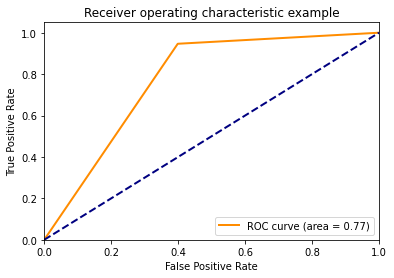

In [87]:
roc_curve2(np.array(encoded_y_test),np.array(predictions),1)

# Sentiment Analysis

In [88]:
from nrclex import NRCLex
cols = NRCLex("boy is good").affect_frequencies
print (cols)

{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.14285714285714285, 'surprise': 0.14285714285714285, 'positive': 0.14285714285714285, 'negative': 0.14285714285714285, 'sadness': 0.0, 'disgust': 0.14285714285714285, 'joy': 0.14285714285714285, 'anticipation': 0.14285714285714285}


In [89]:
affin = open("./AFINN-111.txt").read().split("\n")
from collections import defaultdict
affin_dict = defaultdict(lambda: 0)
for i in affin:
    temp = i.split("\t")
    affin_dict[temp[0]] = temp[1]

In [90]:
def calculate_affin(review,affin_dict):
    temp = 0
    t = review.split()
    for i in t:
#         print(i,temp)      
        temp += int(affin_dict[i])
    print("Affin Sentiment Score Average: ",float(temp)/len(t))
    
    return float(temp)/len(t)
    
calculate_affin("lets not fuck",affin_dict)

Affin Sentiment Score Average:  -1.3333333333333333


-1.3333333333333333

In [91]:
#Input the string, outputs the label with confidence intervals along with NRC sentiment
def tester(string):
    string = remove_stopwords(re.sub('['+punc+']' ,'',string).lower(), stoplist)
    cols = NRCLex(string).affect_frequencies
    print (pd.DataFrame.from_dict(cols, orient='index',columns=['Score']))
    affin_score = calculate_affin(string,affin_dict)
    temp = sentence_vec(string,model_W2V)
    label = model_FCC.predict(temp.reshape(1,-1))
    
    print("The confidence intervals for both labels: ",label)
    if label[0][0] < label[0][1]:
        if cols["positive"] >= 0.0 and cols["negative"] == 0.0 and affin_score > 0:
            print("The label of the tested case is Non Abusive/Non-Harassive with negativity equals zero.") 
            
        else: 
            print("The label of the tested case is Abusive/Harassive with {} confidence interval.\n".format(label[0][1]))
        
    else:
        print("The label of the tested case is Non Abusive/Non Harassive with {} confidence interval.".format(label[0][0]))

# Code Testing

In [92]:
tester("dont tell your parents")

          Score
fear        0.0
anger       0.0
anticip     0.0
trust       0.0
surprise    0.0
positive    0.0
negative    0.0
sadness     0.0
disgust     0.0
joy         0.0
Affin Sentiment Score Average:  0.0
The confidence intervals for both labels:  [[0.7248268 0.2751731]]
The label of the tested case is Non Abusive/Non Harassive with 0.7248268127441406 confidence interval.


In [93]:
tester("I wanna take you to party")

             Score
fear      0.333333
anger     0.000000
anticip   0.000000
trust     0.000000
surprise  0.000000
positive  0.000000
negative  0.333333
sadness   0.333333
disgust   0.000000
joy       0.000000
Affin Sentiment Score Average:  0.0
The confidence intervals for both labels:  [[0.15130429 0.84869564]]
The label of the tested case is Abusive/Harassive with 0.8486956357955933 confidence interval.



In [94]:
tester("lets play")

          Score
fear        0.0
anger       0.0
anticip     0.0
trust       0.0
surprise    0.0
positive    0.0
negative    0.0
sadness     0.0
disgust     0.0
joy         0.0
Affin Sentiment Score Average:  0.0
The confidence intervals for both labels:  [[0.17994562 0.8200544 ]]
The label of the tested case is Abusive/Harassive with 0.8200544118881226 confidence interval.



In [95]:
tester("lets fuck")

          Score
fear        0.0
anger       0.0
anticip     0.0
trust       0.0
surprise    0.0
positive    0.0
negative    0.0
sadness     0.0
disgust     0.0
joy         0.0
Affin Sentiment Score Average:  -2.0
The confidence intervals for both labels:  [[0.00177826 0.9982217 ]]
The label of the tested case is Abusive/Harassive with 0.9982216954231262 confidence interval.



In [96]:
tester("hey kid wanna have some candy?")

             Score
fear      0.333333
anger     0.000000
anticip   0.000000
trust     0.000000
surprise  0.000000
positive  0.000000
negative  0.333333
sadness   0.333333
disgust   0.000000
joy       0.000000
Affin Sentiment Score Average:  0.0
The confidence intervals for both labels:  [[0.01257802 0.987422  ]]
The label of the tested case is Abusive/Harassive with 0.987421989440918 confidence interval.



In [97]:
tester("send me your nude pics")

          Score
fear        0.0
anger       0.0
anticip     0.0
trust       0.0
surprise    0.0
positive    0.0
negative    0.0
sadness     0.0
disgust     0.0
joy         0.0
Affin Sentiment Score Average:  0.0
The confidence intervals for both labels:  [[0.03778158 0.96221846]]
The label of the tested case is Abusive/Harassive with 0.9622184634208679 confidence interval.



In [98]:
tester("send me your pics")

          Score
fear        0.0
anger       0.0
anticip     0.0
trust       0.0
surprise    0.0
positive    0.0
negative    0.0
sadness     0.0
disgust     0.0
joy         0.0
Affin Sentiment Score Average:  0.0
The confidence intervals for both labels:  [[0.036536   0.96346396]]
The label of the tested case is Abusive/Harassive with 0.9634639620780945 confidence interval.



In [99]:
tester("lovely how played")

                 Score
fear          0.000000
anger         0.000000
anticip       0.000000
trust         0.166667
surprise      0.166667
positive      0.166667
negative      0.000000
sadness       0.166667
disgust       0.000000
joy           0.166667
anticipation  0.166667
Affin Sentiment Score Average:  1.5
The confidence intervals for both labels:  [[0.04841033 0.95158964]]
The label of the tested case is Non Abusive/Non-Harassive with negativity equals zero.


In [100]:
tester("boy is good")

                 Score
fear          0.000000
anger         0.000000
anticip       0.000000
trust         0.142857
surprise      0.142857
positive      0.142857
negative      0.142857
sadness       0.000000
disgust       0.142857
joy           0.142857
anticipation  0.142857
Affin Sentiment Score Average:  1.5
The confidence intervals for both labels:  [[0.4138948 0.5861052]]
The label of the tested case is Abusive/Harassive with 0.586105227470398 confidence interval.



In [101]:
tester("lets go to play cricket")

          Score
fear        0.0
anger       0.0
anticip     0.0
trust       0.0
surprise    0.0
positive    0.0
negative    0.0
sadness     0.0
disgust     0.0
joy         0.0
Affin Sentiment Score Average:  0.0
The confidence intervals for both labels:  [[0.28420568 0.71579427]]
The label of the tested case is Abusive/Harassive with 0.7157942652702332 confidence interval.



In [102]:
tester("Hows is the weather in London")

          Score
fear        0.0
anger       0.0
anticip     0.0
trust       0.0
surprise    0.0
positive    0.0
negative    0.0
sadness     0.0
disgust     0.0
joy         0.0
Affin Sentiment Score Average:  0.0
The confidence intervals for both labels:  [[0.97745675 0.02254323]]
The label of the tested case is Non Abusive/Non Harassive with 0.9774567484855652 confidence interval.


# Twitter Extraction and Main

In [103]:
import tweepy
import pandas as pd
import csv
import re 
import string
import preprocessor as p

consumer_key = "MGPtUcPrVfaWLu7TxjCwtFHuM"
consumer_secret = "gMOqFjaPgfs30cTSZKgdRlv7Y9Ag84Ld8cM1ORKH1bx4hEbUIZ"
access_key= "1398329578754555914-TkmRlKKhJDgNZLtQ72rzaOzb9n0vGr"
access_secret = "kliKIuqMthnddviZbDyrKFzN3RvwoWGg9mkxqJOByV7vC"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

def get_tweets(username): 
          
        # Authorization to consumer key and consumer secret 
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 

        # Access to user's access key and access secret 
        auth.set_access_token(access_key, access_secret) 
  
        # Calling api 
        api = tweepy.API(auth) 
  
        # no. of tweets to be extracted 
        number_of_tweets = 5
    
        tweets = []

        print("Retriving tweets for twitter handle: ", username)

        for status in tweepy.Cursor(api.user_timeline, screen_name=username, tweet_mode="extended").items(number_of_tweets):
            tweets.append(status)

        tweet_texts = [tweet.full_text for tweet in tweets]
        favorite_counts = [tweet.favorite_count for tweet in tweets]
        retweet_counts = [tweet.retweet_count for tweet in tweets]
        created_dates = [tweet.created_at for tweet in tweets]

        df = pd.DataFrame({'twitter_handle': username,
                   'created_date': created_dates,
                   'tweet_text': tweet_texts})
        
        print(df)
        
        return tweet_texts

In [111]:
tweets = get_tweets(input("Enter the username: "))

counter = 1
for tweet in tweets:
    print("Tweet # ",counter)
    print("Tweet Text: ",tweet)
    tester(str(tweet))
    counter +=1 

Enter the username: BluBlu12501166
Retriving tweets for twitter handle:  BluBlu12501166
   twitter_handle        created_date                             tweet_text
0  BluBlu12501166 2021-09-03 19:55:14  Lovely to see Arsenal play like this.
1  BluBlu12501166 2021-09-03 19:52:43               How's the weather today?
2  BluBlu12501166 2021-09-03 19:51:06               This kid got a nice bum.
Tweet #  1
Tweet Text:  Lovely to see Arsenal play like this.
                 Score
fear          0.000000
anger         0.000000
anticip       0.000000
trust         0.166667
surprise      0.166667
positive      0.166667
negative      0.000000
sadness       0.166667
disgust       0.000000
joy           0.166667
anticipation  0.166667
Affin Sentiment Score Average:  1.0
The confidence intervals for both labels:  [[0.0097107  0.99028933]]
The label of the tested case is Non Abusive/Non-Harassive with negativity equals zero.
Tweet #  2
Tweet Text:  How's the weather today?
          Score
fear     